In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\anura\Desktop\d\Logistic Regression\Logistic Regression\Titanic_train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
numerical_col =df.select_dtypes(include =['int64','float64']).columns
numerical_col

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [5]:
categorical_col =df.select_dtypes(include =["object"]).columns
categorical_col

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [6]:
df.describe() #descriptive satistics

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


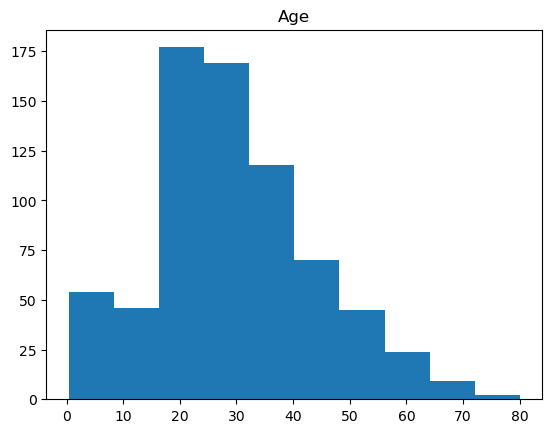

Skewness 0.38910778230082704


In [7]:
# Histogram for age column
import matplotlib.pyplot as plt
plt.hist(df["Age"])
plt.title("Age")
plt.show()
print("Skewness",df["Age"].skew())

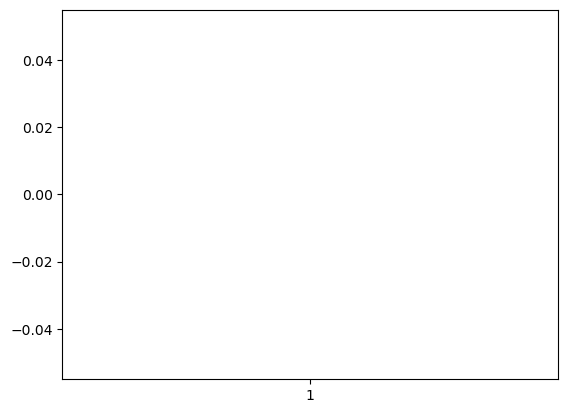

In [8]:
# box plot for age
plt.boxplot(df["Age"])
plt.show()
Q1 = df["Age"].quantile(0.25)
Q3 = df["Age"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df["Age"] < lower_bound) | (df["Age"] > upper_bound)]

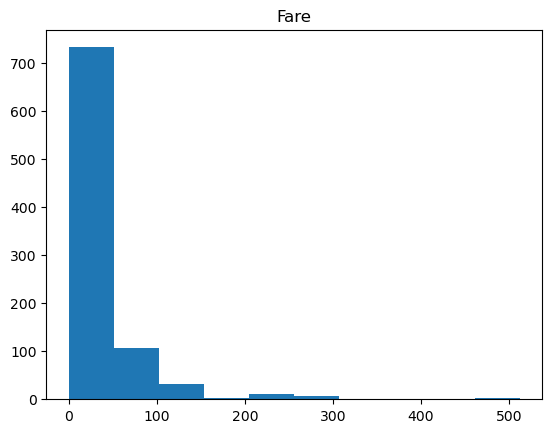

Skewness 4.787316519674893


In [9]:
# Histogram for Fare column
import matplotlib.pyplot as plt
plt.hist(df["Fare"])
plt.title("Fare")
plt.show()
print("Skewness",df["Fare"].skew())

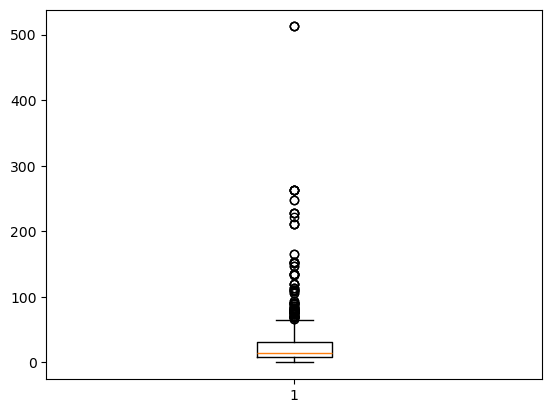

Outliers in Volume Column:
      PassengerId  Survived  Pclass  \
1              2         1       1   
27            28         0       1   
31            32         1       1   
34            35         0       1   
52            53         1       1   
..           ...       ...     ...   
846          847         0       3   
849          850         1       1   
856          857         1       1   
863          864         0       3   
879          880         1       1   

                                                  Name     Sex   Age  SibSp  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
27                      Fortune, Mr. Charles Alexander    male  19.0      3   
31      Spencer, Mrs. William Augustus (Marie Eugenie)  female   NaN      1   
34                             Meyer, Mr. Edgar Joseph    male  28.0      1   
52            Harper, Mrs. Henry Sleeper (Myna Haxtun)  female  49.0      1   
..                                       

In [10]:
# box plot for Fare
plt.boxplot(df["Fare"])
plt.show()
Q1 = df["Fare"].quantile(0.25)
Q3 = df["Fare"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df["Fare"] < lower_bound) | (df["Fare"] > upper_bound)]
print("Outliers in Volume Column:\n", outliers)
print(f"Number of outliers: {len(outliers)}")

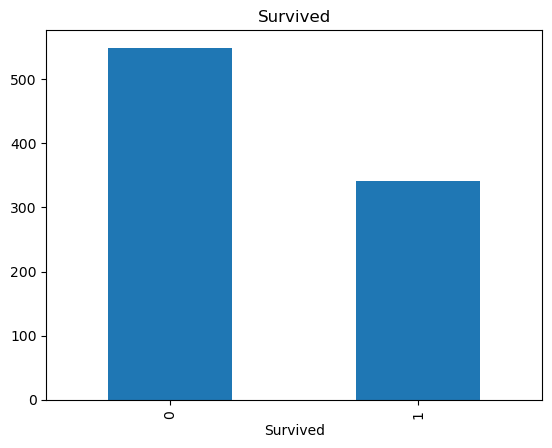

Survived
0    549
1    342
Name: count, dtype: int64

In [11]:
# bar chart on Survived column
df["Survived"].value_counts().plot(kind='bar')
plt.title("Survived")
plt.show()
df["Survived"].value_counts()

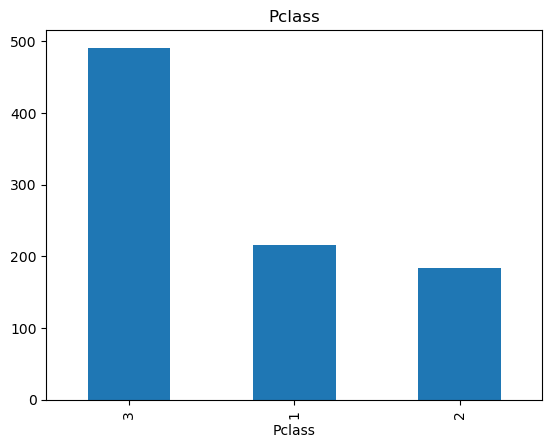

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [12]:
# bar chart on Pclass column
df["Pclass"].value_counts().plot(kind='bar')
plt.title("Pclass")
plt.show()
df["Pclass"].value_counts()

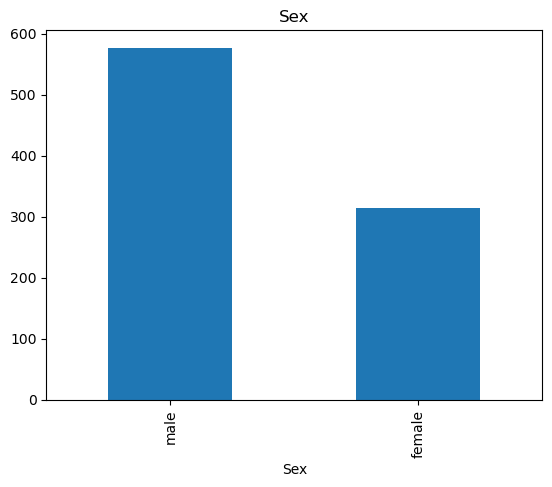

Sex
male      577
female    314
Name: count, dtype: int64

In [13]:
# bar chart on Sex column
df["Sex"].value_counts().plot(kind='bar')
plt.title("Sex")
plt.show()
df["Sex"].value_counts()

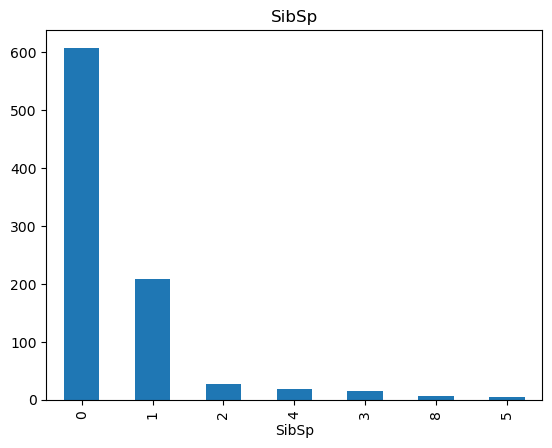

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [14]:
# bar chart on SibSp column
df["SibSp"].value_counts().plot(kind='bar')
plt.title("SibSp")
plt.show()
df["SibSp"].value_counts()

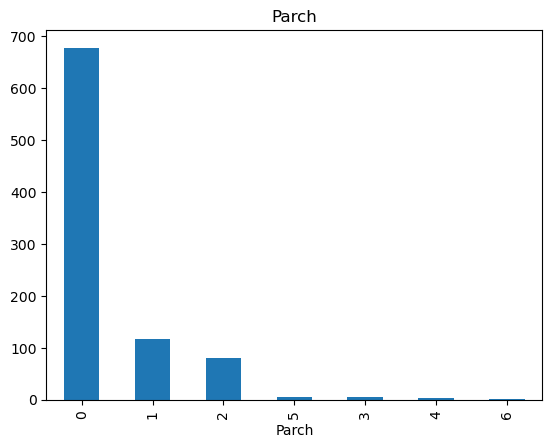

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

In [15]:
# bar chart on Parch column
df["Parch"].value_counts().plot(kind='bar')
plt.title("Parch")
plt.show()
df["Parch"].value_counts()

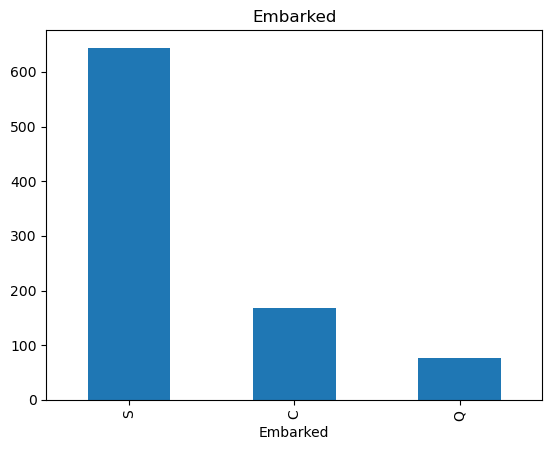

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [16]:
# bar chart on Embarked column
df["Embarked"].value_counts().plot(kind='bar')
plt.title("Embarked")
plt.show()
df["Embarked"].value_counts()

<Axes: xlabel='Survived', ylabel='Age'>

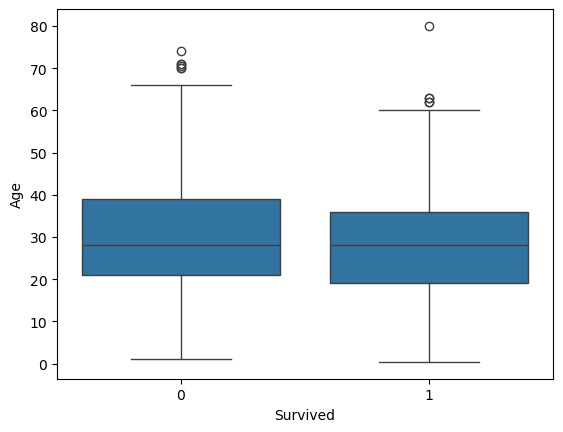

In [17]:
sns.boxplot(x='Survived', y='Age', data=df)

we can see most of the female  survived


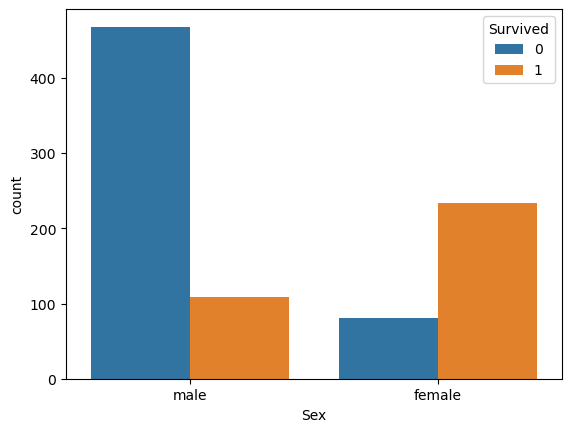

In [18]:
sns.countplot(x='Sex', hue='Survived', data=df)
print("we can see most of the female  survived")

<Axes: xlabel='Age', ylabel='Count'>

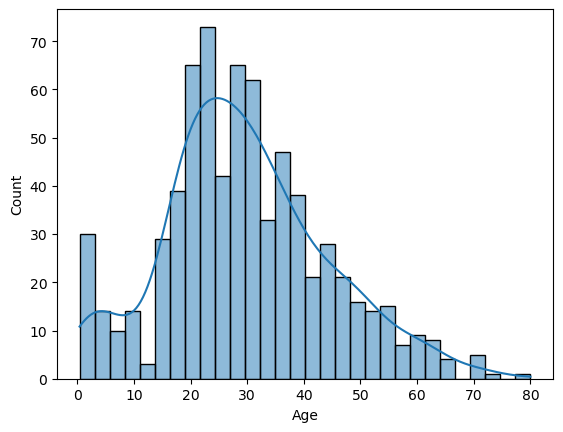

In [19]:
sns.histplot(df['Age'], bins=30, kde=True)

<Axes: xlabel='Pclass', ylabel='Fare'>

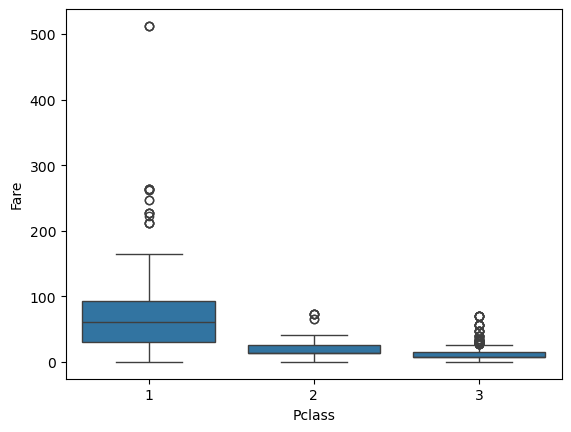

In [20]:
sns.boxplot(x='Pclass', y='Fare', data=df)

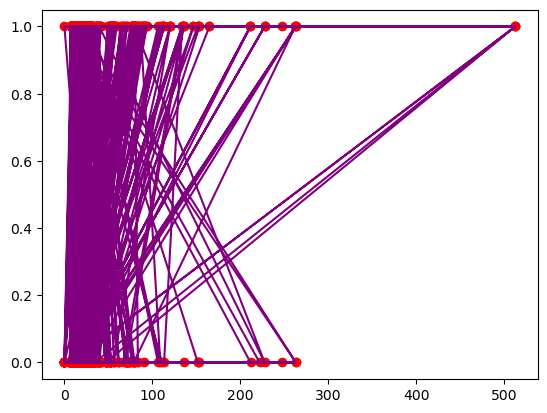

In [21]:
import matplotlib.pyplot as plt 
plt.scatter(x =df["Fare"], y =df["Survived"], color ='red')
plt.plot(df["Fare"], df["Survived"],c ='purple')
plt.show()


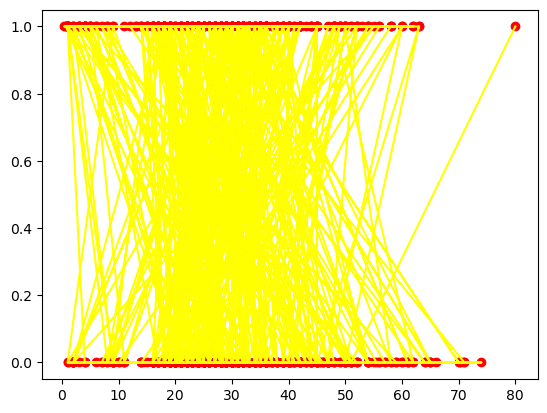

In [22]:
import matplotlib.pyplot as plt 
plt.scatter(x =df["Age"], y =df["Survived"], color ='red')
plt.plot(df["Age"], df["Survived"],c ='yellow')
plt.show()


In [23]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


### Data transformation

In [24]:
#DATA TRANSFORMATION
from sklearn.preprocessing import LabelEncoder 
LE =LabelEncoder()
df["Name"] =LE.fit_transform(df["Name"])
print(df["Name"])

0      108
1      190
2      353
3      272
4       15
      ... 
886    548
887    303
888    413
889     81
890    220
Name: Name, Length: 891, dtype: int32


In [25]:
#DATA TRANSFORMATION
from sklearn.preprocessing import LabelEncoder 
LE =LabelEncoder()
df["Sex"] =LE.fit_transform(df["Sex"])
print(df["Sex"])

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int32


In [26]:
#DATA TRANSFORMATION
from sklearn.preprocessing import LabelEncoder 
LE =LabelEncoder()
df["Ticket"] =LE.fit_transform(df["Ticket"])
print(df["Ticket"])

0      523
1      596
2      669
3       49
4      472
      ... 
886    101
887     14
888    675
889      8
890    466
Name: Ticket, Length: 891, dtype: int32


In [27]:
#DATA TRANSFORMATION
from sklearn.preprocessing import LabelEncoder 
LE =LabelEncoder()
df["Cabin"] =LE.fit_transform(df["Cabin"])
print(df["Cabin"])

0      147
1       81
2      147
3       55
4      147
      ... 
886    147
887     30
888    147
889     60
890    147
Name: Cabin, Length: 891, dtype: int32


In [28]:
#DATA TRANSFORMATION
from sklearn.preprocessing import LabelEncoder 
LE =LabelEncoder()
df["Embarked"] =LE.fit_transform(df["Embarked"])
print(df["Embarked"])

0      2
1      0
2      2
3      2
4      2
      ..
886    2
887    2
888    2
889    0
890    1
Name: Embarked, Length: 891, dtype: int32


In [29]:

# Fill missing with median/mean
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill missing with mean/medain
df['Cabin'].fillna(df['Cabin'].median(), inplace=True)

# Fill missing with median/mean
df['Embarked'].fillna(df['Embarked'].median(), inplace=True)

C:\Users\anura\AppData\Local\Temp\ipykernel_20492\3415624715.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\anura\AppData\Local\Temp\ipykernel_20492\3415624715.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [30]:
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [31]:
df.corr()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,1.000000,-0.005007,-0.035144,-0.038559,0.042939,0.034212,-0.057527,-0.001652,-0.056554,0.012658,-0.035077,0.013083
Survived,-0.005007,1.000000,-0.338481,-0.057343,-0.543351,-0.064910,-0.035322,0.081629,-0.164549,0.257307,-0.254888,-0.163517
Pclass,-0.035144,-0.338481,1.000000,0.052831,0.131900,-0.339898,0.083081,0.018443,0.319869,-0.549500,0.684121,0.157112
Name,-0.038559,-0.057343,0.052831,1.000000,0.020314,0.048252,-0.017230,-0.049105,0.047348,-0.049173,0.061959,-0.004557
Sex,0.042939,-0.543351,0.131900,0.020314,1.000000,0.081163,-0.114631,-0.245489,0.059372,-0.182333,0.096681,0.104057
Age,0.034212,-0.064910,-0.339898,0.048252,0.081163,1.000000,-0.233296,-0.172482,-0.070382,0.096688,-0.240839,-0.014205
SibSp,-0.057527,-0.035322,0.083081,-0.017230,-0.114631,-0.233296,1.000000,0.414838,0.079461,0.159651,0.043593,0.066654
Parch,-0.001652,0.081629,0.018443,-0.049105,-0.245489,-0.172482,0.414838,1.000000,0.020003,0.216225,-0.028324,0.038322
Ticket,-0.056554,-0.164549,0.319869,0.047348,0.059372,-0.070382,0.079461,0.020003,1.000000,-0.013885,0.243696,-0.006041
Fare,0.012658,0.257307,-0.549500,-0.049173,-0.182333,0.096688,0.159651,0.216225,-0.013885,1.000000,-0.503355,-0.221226


In [32]:
X =df[["Sex","Ticket","Fare","Cabin","Embarked"]]
print(X.head())
Y =df["Survived"] #Target variable

   Sex  Ticket     Fare  Cabin  Embarked
0    1     523   7.2500    147         2
1    0     596  71.2833     81         0
2    0     669   7.9250    147         2
3    0      49  53.1000     55         2
4    1     472   8.0500    147         2


In [33]:
from sklearn.linear_model import LogisticRegression 
model =LogisticRegression()
model.fit(X, Y)

LogisticRegression()

In [34]:
df["Y_pred"] =model.predict(X)

In [35]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Y_pred
0,1,0,3,108,1,22.0,1,0,523,7.2500,147,2,0
1,2,1,1,190,0,38.0,1,0,596,71.2833,81,0,1
2,3,1,3,353,0,26.0,0,0,669,7.9250,147,2,1
3,4,1,1,272,0,35.0,1,0,49,53.1000,55,2,1
4,5,0,3,15,1,35.0,0,0,472,8.0500,147,2,0


### 4. Model Evaluation

In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score 
score =accuracy_score(Y, df["Y_pred"])
print("accuracy score:", np.round(score, 2))

ps=precision_score(Y, df["Y_pred"])
print("precision score:", np.round(ps, 2))

rs =recall_score(Y, df["Y_pred"])
print("recall score:", np.round(rs, 2))

f1s =f1_score(Y, df["Y_pred"])
print("F1 score:", np.round(f1s, 2))

accuracy score: 0.79
precision score: 0.72
recall score: 0.72
F1 score: 0.72


In [37]:
from sklearn.metrics import roc_auc_score
auc =roc_auc_score(Y, df["Y_pred"])
print("Area under curve:",  np.round(auc, 3))
print("Area under curve:", (auc * 100).round(3))

Area under curve: 0.774
Area under curve: 77.404


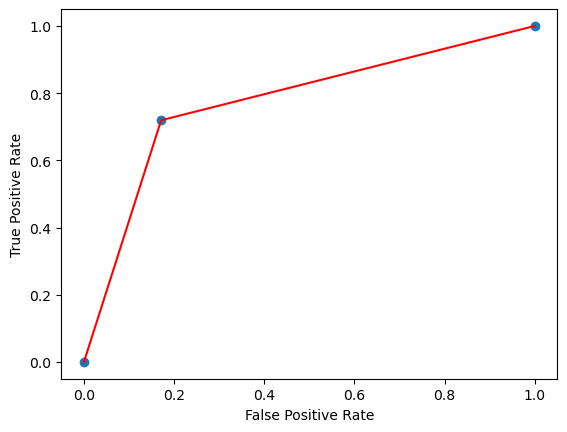

In [38]:
from sklearn.metrics import roc_curve 

fpr,tpr,dummy =roc_curve(Y, df["Y_pred"])

import matplotlib.pyplot as plt 
plt.scatter(x =fpr, y =tpr)
plt.plot(fpr,tpr, color ="red")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

### 5. Interpretation

In [39]:
model.intercept_

array([2.90608822])

In [40]:
df.corr()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Y_pred
PassengerId,1.000000,-0.005007,-0.035144,-0.038559,0.042939,0.034212,-0.057527,-0.001652,-0.056554,0.012658,-0.035077,0.013083,-0.040915
Survived,-0.005007,1.000000,-0.338481,-0.057343,-0.543351,-0.064910,-0.035322,0.081629,-0.164549,0.257307,-0.254888,-0.163517,0.548689
Pclass,-0.035144,-0.338481,1.000000,0.052831,0.131900,-0.339898,0.083081,0.018443,0.319869,-0.549500,0.684121,0.157112,-0.223789
Name,-0.038559,-0.057343,0.052831,1.000000,0.020314,0.048252,-0.017230,-0.049105,0.047348,-0.049173,0.061959,-0.004557,-0.027451
Sex,0.042939,-0.543351,0.131900,0.020314,1.000000,0.081163,-0.114631,-0.245489,0.059372,-0.182333,0.096681,0.104057,-0.939103
Age,0.034212,-0.064910,-0.339898,0.048252,0.081163,1.000000,-0.233296,-0.172482,-0.070382,0.096688,-0.240839,-0.014205,-0.049185
SibSp,-0.057527,-0.035322,0.083081,-0.017230,-0.114631,-0.233296,1.000000,0.414838,0.079461,0.159651,0.043593,0.066654,0.107283
Parch,-0.001652,0.081629,0.018443,-0.049105,-0.245489,-0.172482,0.414838,1.000000,0.020003,0.216225,-0.028324,0.038322,0.273190
Ticket,-0.056554,-0.164549,0.319869,0.047348,0.059372,-0.070382,0.079461,0.020003,1.000000,-0.013885,0.243696,-0.006041,-0.125128
Fare,0.012658,0.257307,-0.549500,-0.049173,-0.182333,0.096688,0.159651,0.216225,-0.013885,1.000000,-0.503355,-0.221226,0.295156


### 6. Deployment with Streamlit:

In [41]:
from sklearn.linear_model import LogisticRegression
import joblib

clf = LogisticRegression(max_iter=1000)
clf.fit(X,Y)

joblib.dump(clf, "model.pkl")     # <-- THIS is the file you must commit / upload


['model.pkl']

In [42]:
 type(clf)

sklearn.linear_model._logistic.LogisticRegression

In [43]:
import joblib
joblib.dump(model, 'model.pkl')

['model.pkl']

### github

In [ ]:
https://github.com/Anuragvarma77/Logistic-Regression

### Streamlitlib

In [ ]:
https://logistic-regression-tvqc8hrktxfwtksptahsqy.streamlit.app/

### Test Data

### 1. Data Exploration

In [44]:
import numpy as np
import pandas as pd 
df =pd.read_csv(r"C:\Users\anura\Desktop\d\Logistic Regression\Logistic Regression\Titanic_test.csv")
df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [45]:
df.shape

(418, 11)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [47]:
numerical_col =df.select_dtypes(include =['int64','float64']).columns
numerical_col

Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [48]:
categorical_col =df.select_dtypes(include =["object"]).columns
categorical_col

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [49]:
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


### Histograms

0      3
1      3
2      2
3      3
4      3
      ..
413    3
414    1
415    3
416    3
417    3
Name: Pclass, Length: 418, dtype: int64


<Axes: >

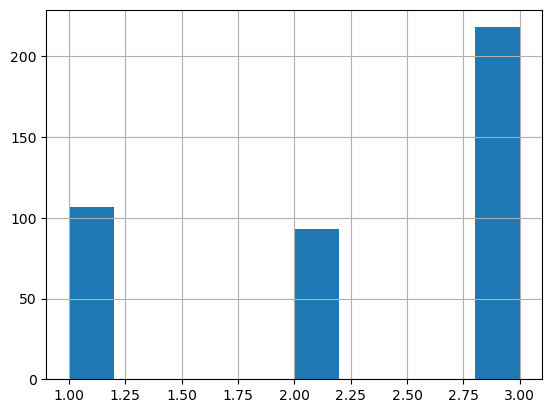

In [50]:
#EDA 
#histograms
import matplotlib.pyplot as plt 
print(df["Pclass"])
df["Pclass"].hist()

0      34.5
1      47.0
2      62.0
3      27.0
4      22.0
       ... 
413     NaN
414    39.0
415    38.5
416     NaN
417     NaN
Name: Age, Length: 418, dtype: float64


<Axes: >

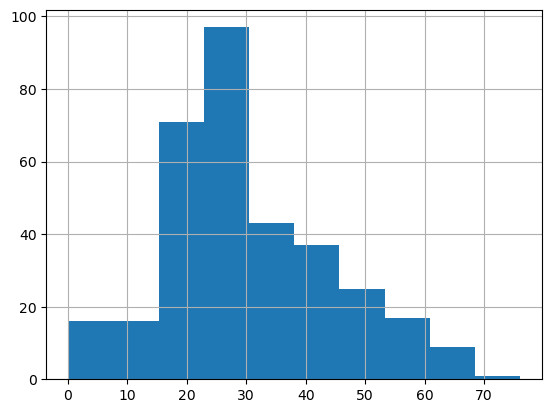

In [51]:
print(df["Age"])
df["Age"].hist()

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    0
415    0
416    0
417    1
Name: SibSp, Length: 418, dtype: int64


<Axes: >

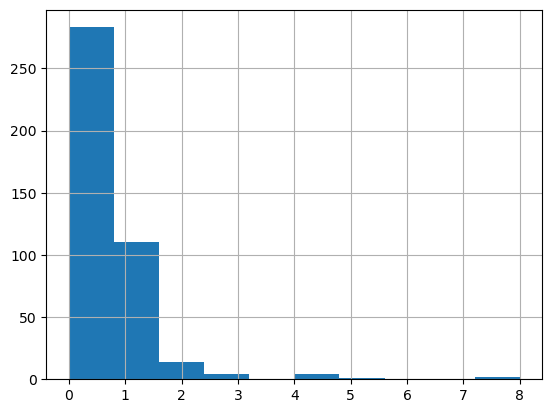

In [52]:
print(df["SibSp"])
df["SibSp"].hist()

0        male
1      female
2        male
3        male
4      female
        ...  
413      male
414    female
415      male
416      male
417      male
Name: Sex, Length: 418, dtype: object


<Axes: >

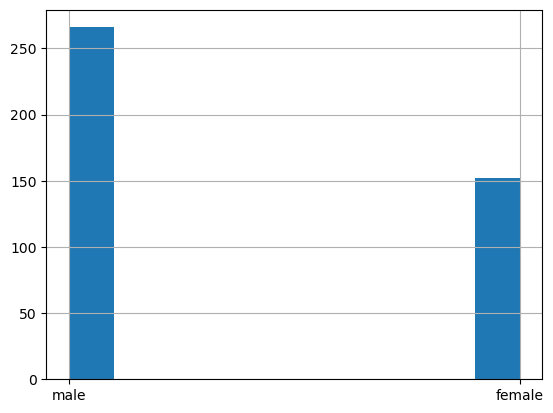

In [53]:
print(df["Sex"])
df["Sex"].hist()

0                  330911
1                  363272
2                  240276
3                  315154
4                 3101298
              ...        
413             A.5. 3236
414              PC 17758
415    SOTON/O.Q. 3101262
416                359309
417                  2668
Name: Ticket, Length: 418, dtype: object


<Axes: >

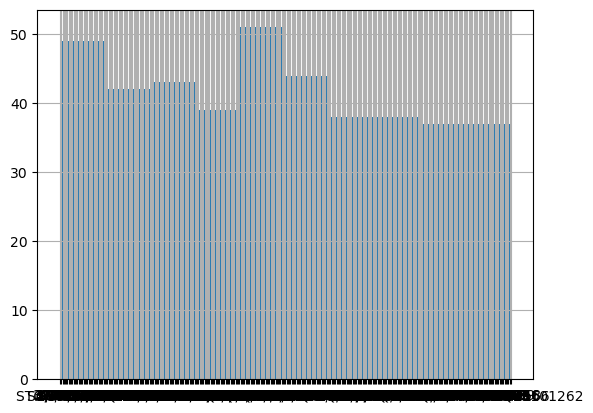

In [54]:
print(df["Ticket"])
df["Ticket"].hist()

0        7.8292
1        7.0000
2        9.6875
3        8.6625
4       12.2875
         ...   
413      8.0500
414    108.9000
415      7.2500
416      8.0500
417     22.3583
Name: Fare, Length: 418, dtype: float64


<Axes: >

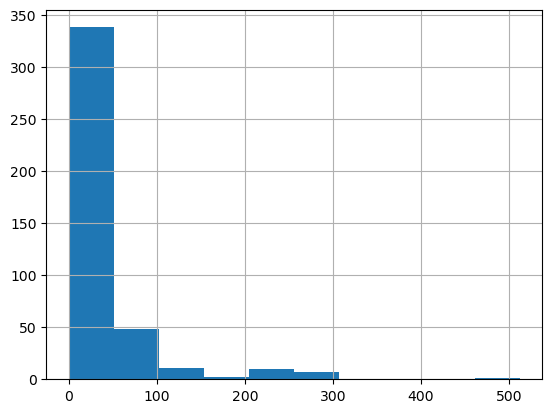

In [55]:
print(df["Fare"])
df["Fare"].hist()

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
413     NaN
414    C105
415     NaN
416     NaN
417     NaN
Name: Cabin, Length: 418, dtype: object


<Axes: >

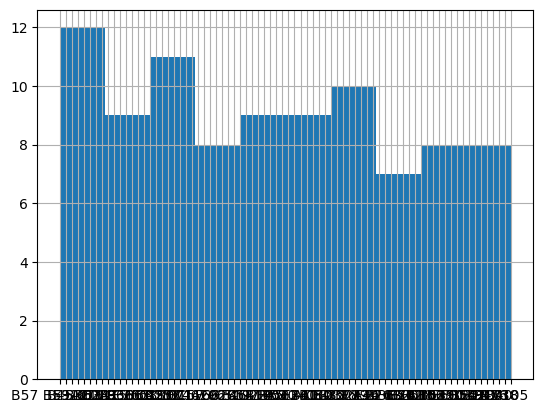

In [56]:
print(df["Cabin"])
df["Cabin"].hist()

0      Q
1      S
2      Q
3      S
4      S
      ..
413    S
414    C
415    S
416    S
417    C
Name: Embarked, Length: 418, dtype: object


<Axes: >

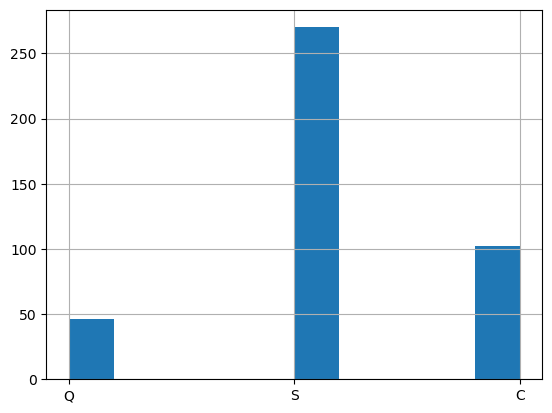

In [57]:
print(df["Embarked"])
df["Embarked"].hist()

### Boxplot

<Axes: >

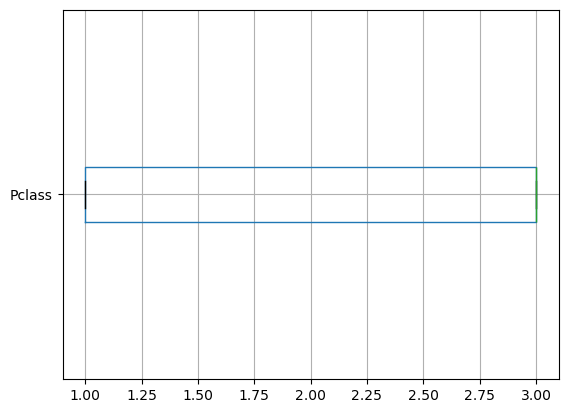

In [58]:
#box plots 
df.boxplot(column =["Pclass"], vert =False)

<Axes: >

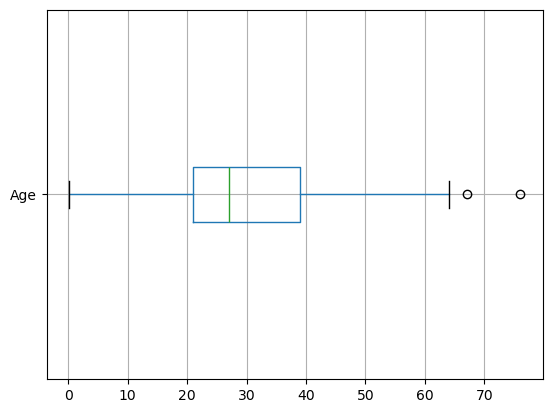

In [59]:
#box plots 
df.boxplot(column =["Age"], vert =False)

<Axes: >

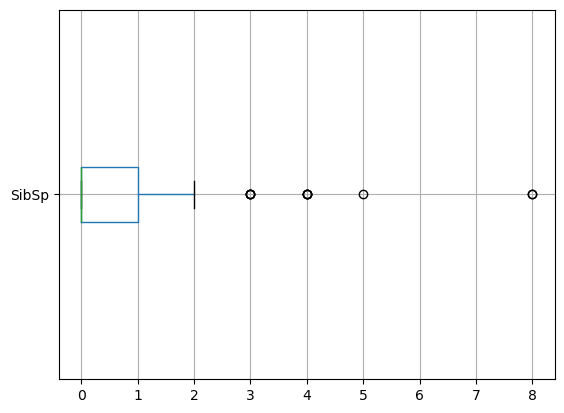

In [60]:
df.boxplot(column =["SibSp"], vert =False)

<Axes: >

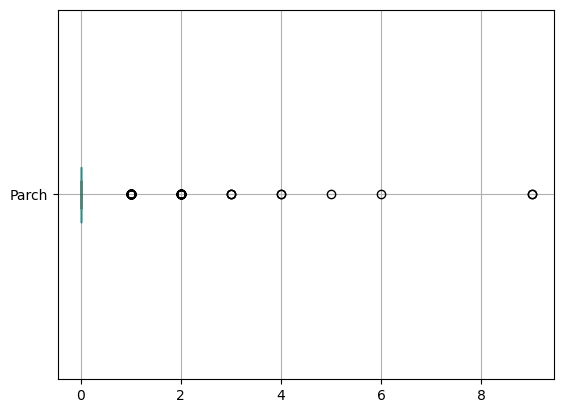

In [61]:
df.boxplot(column =["Parch"], vert =False)

<Axes: >

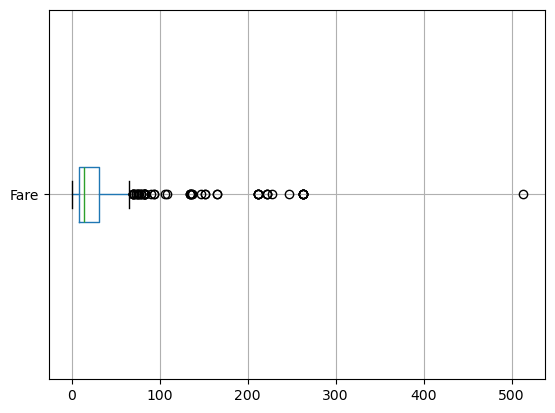

In [62]:
df.boxplot(column =["Fare"], vert =False)

In [63]:
df.corr

<bound method DataFrame.corr of      PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex   Age  SibSp  Parch              Ticket      Fare Cabin Embarked  


### 2. Data Preprocessing

In [64]:
print(df.isnull().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [65]:
#DATA TRANSFORMATION
from sklearn.preprocessing import LabelEncoder 
LE =LabelEncoder()
df["Name"] =LE.fit_transform(df["Name"])
print(df["Name"])

0      206
1      403
2      269
3      408
4      178
      ... 
413    353
414    283
415    332
416    384
417    302
Name: Name, Length: 418, dtype: int32


In [66]:
#Label Encoder
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df["Name"]     =LE.fit_transform(df["Name"])
df["Sex"]      =LE.fit_transform(df["Sex"])
df["Ticket"]   =LE.fit_transform(df["Ticket"])
df["Cabin"]    =LE.fit_transform(df["Cabin"])
df["Embarked"] =LE.fit_transform(df["Embarked"])

df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,206,1,34.5,0,0,152,7.8292,76,1
1,893,3,403,0,47.0,1,0,221,7.0000,76,2
2,894,2,269,1,62.0,0,0,73,9.6875,76,1
3,895,3,408,1,27.0,0,0,147,8.6625,76,2
4,896,3,178,0,22.0,1,1,138,12.2875,76,2


In [67]:
#DATA TRANSFORMATION
from sklearn.preprocessing import LabelEncoder 
LE =LabelEncoder()
df["Sex"] =LE.fit_transform(df["Sex"])
print(df["Sex"])

0      1
1      0
2      1
3      1
4      0
      ..
413    1
414    0
415    1
416    1
417    1
Name: Sex, Length: 418, dtype: int64


In [68]:
#DATA TRANSFORMATION
from sklearn.preprocessing import LabelEncoder 
LE =LabelEncoder()
df["Ticket"] =LE.fit_transform(df["Ticket"])
print(df["Ticket"])

0      152
1      221
2       73
3      147
4      138
      ... 
413    267
414    324
415    346
416    220
417    105
Name: Ticket, Length: 418, dtype: int64


In [69]:
#DATA TRANSFORMATION
from sklearn.preprocessing import LabelEncoder 
LE =LabelEncoder()
df["Cabin"] =LE.fit_transform(df["Cabin"])
print(df["Cabin"])

0      76
1      76
2      76
3      76
4      76
       ..
413    76
414    22
415    76
416    76
417    76
Name: Cabin, Length: 418, dtype: int64


In [70]:
#DATA TRANSFORMATION
from sklearn.preprocessing import LabelEncoder 
LE =LabelEncoder()
df["Embarked"] =LE.fit_transform(df["Embarked"])
print(df["Embarked"])

0      1
1      2
2      1
3      2
4      2
      ..
413    2
414    0
415    2
416    2
417    0
Name: Embarked, Length: 418, dtype: int64


In [71]:
df.corr()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,1.000000,-0.026751,0.042079,0.023245,-0.034102,0.003818,0.043080,-0.012301,0.008211,0.012060,0.040699
Pclass,-0.026751,1.000000,0.038918,0.108615,-0.492143,0.001087,0.018721,0.292088,-0.577147,0.660165,0.227983
Name,0.042079,0.038918,1.000000,0.067263,-0.014985,0.043994,-0.010295,0.025531,-0.017685,0.040390,-0.081444
Sex,0.023245,0.108615,0.067263,1.000000,0.000013,-0.099943,-0.159120,-0.047663,-0.191514,0.127938,0.076281
Age,-0.034102,-0.492143,-0.014985,0.000013,1.000000,-0.091587,-0.061249,-0.137176,0.337932,-0.395432,-0.175848
SibSp,0.003818,0.001087,0.043994,-0.099943,-0.091587,1.000000,0.306895,0.025199,0.171539,-0.080243,0.052708
Parch,0.043080,0.018721,-0.010295,-0.159120,-0.061249,0.306895,1.000000,0.109888,0.230046,-0.045538,0.054577
Ticket,-0.012301,0.292088,0.025531,-0.047663,-0.137176,0.025199,0.109888,1.000000,-0.018921,0.162064,0.093672
Fare,0.008211,-0.577147,-0.017685,-0.191514,0.337932,0.171539,0.230046,-0.018921,1.000000,-0.574490,-0.257183
Cabin,0.012060,0.660165,0.040390,0.127938,-0.395432,-0.080243,-0.045538,0.162064,-0.574490,1.000000,0.273485


In [72]:
#fill missing values with Median or Mean 
df["Age"].fillna(df["Age"].mean(), inplace =True)
df["Fare"].fillna(df["Fare"].median(), inplace =True)
df["Cabin"].fillna(df["Cabin"].mean(), inplace =True) 

C:\Users\anura\AppData\Local\Temp\ipykernel_20492\2236400978.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].mean(), inplace =True)
C:\Users\anura\AppData\Local\Temp\ipykernel_20492\2236400978.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

### 3.Model Building

In [73]:
#Data partition 
Y =df["Survived"]
X =df.iloc[:, 8:]
X

KeyError: 'Survived'

In [ ]:
from sklearn.linear_model import LogisticRegression 
model =LogisticRegression()
model.fit(X, Y)


In [ ]:
df["Y_pred"] =model.predict(X)

### 4. Model Evaluation:

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score 
score =accuracy_score(Y, df["Y_pred"])
print("accuracy score:", np.round(score, 2))

ps=precision_score(Y, df["Y_pred"])
print("precision score:", np.round(ps, 2))

rs =recall_score(Y, df["Y_pred"])
print("recall score:", np.round(rs, 2))

f1s =f1_score(Y, df["Y_pred"])
print("F1 score:", np.round(f1s, 2))


In [ ]:
from sklearn.metrics import roc_auc_score
auc =roc_auc_score(Y, df["Y_pred"])
print("Area under curve:",  np.round(auc, 3))
print("Area under curve:", (auc * 200).round(3))

In [ ]:
from sklearn.metrics import roc_curve 

fpr,tpr,dummy =roc_curve(Y, df["Y_pred"])

import matplotlib.pyplot as plt 
plt.scatter(x =fpr, y =tpr)
plt.plot(fpr,tpr, color ="red")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

### 5. Interpretation:

In [ ]:
model.intercept_

In [ ]:
df.corr()

### Interview Questions:

In [ ]:
print('''
1. What is the difference between precision and recall?

Sensitivity / Recall:

    From the overall Actual positiveshow much our model successfully predicted them as positives. 
    Percentage of positives that are successfully classified as positives. 
True positive Rate 
    TPR = TP/(TP + FN)
     If FN decreases Sensitivity increases, If FN increases, Sensitivity Decreases

-->Precision:

    from the model predicted positives what Percentage of people are real positives.
    The approach here is to find what percentage of the model’s positive (1’s) predictions are accurate. 
    Precision is calculated as the number of correct positive predictions (TP) divided by the total number of positive predictions 
    (TP) / (TP + FP)


2. What is cross-validation, and why is it important in binary classification?

Model is fitted on training or known data. One must do the cross-validation & model tuning before making 
any conclusions about the results. Cross-validation is done to issues like over fitting and model tuning is 
done to get the best model parameters which can give best required results. Once you have chosen the 
models, then you can perform model tuning and cross-validation for each of the chosen models. Cross
validation is like repeatedly checking the model performance on unknown dataset and thereby increasing 
the assurance of the model performance on any data set which will be fed into this model in future.

                        { OR }
Cross-validation is a statistical technique used to evaluate the performance of a machine learning model and ensure that it generalizes 
well to unseen data. It is especially important in binary classification (where there are only two class labels, e.g., "positive" and "negative") 
because it helps avoid overfitting and gives a more reliable estimate of model performance.

Cross-validation involves splitting the dataset into multiple subsets (called folds), training the model on some folds, 
and testing it on the remaining fold(s). This process is repeated several times, and the results are averaged.

Common types:
    K-Fold Cross-Validation: The dataset is divided into K equal parts. The model is trained on K-1 folds and tested on the remaining fold. 
    This process repeats K times with a different test fold each time.

    Stratified K-Fold Cross-Validation: Similar to K-Fold, but ensures each fold has the same proportion of class labels. 
    Very useful for binary classification with imbalanced data.

Why is Cross-Validation Important in Binary Classification?
    1.Reduces Overfitting Risk
    2.Gives Robust Performance Metrics
    3.Handles Class Imbalance
    4.Supports Model Selection''')
